In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
road=cv2.imread("D:\Salt-Ash-Region_Seacliff-Bridge.jpg")

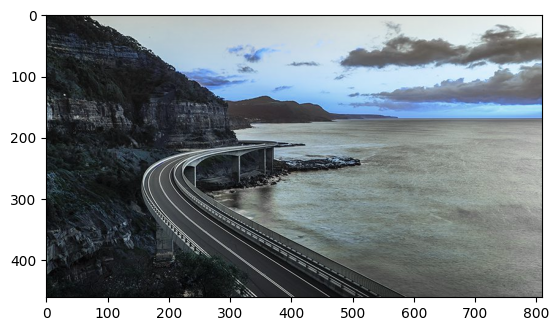

In [3]:
plt.imshow(road)

In [4]:
road_copy= np.copy(road)

In [5]:
road.shape

(461, 810, 3)

In [6]:
marker_image= np.zeros(road.shape[:2],dtype=np.int32) 

In [7]:
segments= np.zeros(road.shape,dtype=np.uint8)

In [8]:
marker_image.shape

(461, 810)

In [9]:
segments.shape

(461, 810, 3)

Qualitative colormaps -->   https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [10]:
from matplotlib import cm

In [11]:
cm.tab10(0) # return red , green , blue and alpha parameter

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
#we will make the ranges of tab10 between 0-->255 not 0-->1

In [13]:
tuple(np.array(cm.tab10(0)[:3])*255)

(31.0, 119.0, 180.0)

In [14]:
def creat_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [15]:
colors=[]
for i in range(10):
    colors.append(creat_rgb(i))

In [16]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [17]:
# Global Variables
#index position for colors in cm:
current_marker = 1
n_markers = 10 
# Checks if the markers have been updated by th watershed algorithm:
marks_updated= False

In [18]:
# CallBack Function

def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event== cv2.EVENT_LBUTTONDOWN:
        # here we need to draw 2 circles: one for tracking the markers that we sent it back to the watershed algorithm
        #                               : the second for displaying on the user image that going to see
        
        cv2.circle(marker_image,(x,y),10,(current_marker),-1) # --> markers passed to watershed algorithm
        #circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
        
        
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1) # --> what the user see in the road image
        
        marks_updated=True
        

In [20]:
# While True

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    
    cv2.imshow('Watershed Segments', segments)
    
    cv2.imshow('Road Image',road_copy)
    
# CLOSE ALL WINDOWS
    
    k = cv2.waitKey(1)
    
    if k == 27 :
        break
    
# CLEARING ALL THE COLORS WHEN WE PRESS THE C KEY

    elif k == ord('c'):
        road_copy = road.copy()
        marker_image= np.zeros(road.shape[:2],dtype=np.int32) 
        segments= np.zeros(road.shape,dtype=np.uint8)    
    
# UPDATE COLOR CHOICE
    
    elif k>0 and chr(k).isdigit():
        current_marker= int(chr(k))
    
# UPDATE THE MARKERS

    if marks_updated:
        
        marker_image_copy=marker_image.copy()
        cv2.watershed(road,marker_image_copy)
                            
        segments=np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]

cv2.destroyAllWindows()